<a href="https://colab.research.google.com/github/alessandrossC/ML-for-people/blob/main/%22HW_2_4_kNN_%D0%9A%D1%80%D0%BE%D1%81%D0%B2%D0%B0%D0%BB%D1%96%D0%B4%D0%B0%D1%86%D1%96%D1%8F_%D1%96_%D1%82%D1%8E%D0%BD%D0%B8%D0%BD%D0%B3_%D0%B3%D1%96%D0%BF%D0%B5%D1%80%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D1%96%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням kNearestNeighboors, знайдемо оптимальні гіперпараметри для цього методу і зробимо базові ансамблі. Це дасть змогу порівняти перформанс моделі з попередніми вивченими методами.

0. Зчитайте дані `train.csv` та зробіть препроцесинг використовуючи написаний Вами скрипт `process_bank_churn.py` так, аби в результаті отримати дані в розбитті X_train, train_targets, X_val, val_targets для експериментів.

  Якщо Вам не вдалось реалізувати в завданні `2.3. Дерева прийняття рішень` скрипт `process_bank_churn.py` - можна скористатись готовим скриптом з запропонованого рішення того завдання.

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
!wget -O process_bank_churn.py https://raw.githubusercontent.com/alessandrossC/ML-for-people/main/process_bank_churn.py

--2025-02-23 14:07:41--  https://raw.githubusercontent.com/alessandrossC/ML-for-people/main/process_bank_churn.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6466 (6.3K) [text/plain]
Saving to: ‘process_bank_churn.py’

process_bank_churn. 100%[===================>]   6.31K  --.-KB/s    in 0s      

2025-02-23 14:07:41 (35.7 MB/s) - ‘process_bank_churn.py’ saved [6466/6466]



In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import sys

# Добавляем текущую папку в пути Python
sys.path.append(".")

# Пробуем импортировать
from process_bank_churn import process_data

In [76]:
import pandas as pd

df = pd.read_csv('/content/train.csv')
processed_data = process_data(df, scaler_numeric=False)
print(processed_data)

{'train_x':        CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0            682.0  30.0     1.0  131394.56            1.0        1.0   
1            684.0  39.0     2.0  178058.06            1.0        1.0   
2            705.0  35.0     6.0  116320.68            2.0        1.0   
3            669.0  58.0     0.0       0.00            2.0        0.0   
4            707.0  21.0     3.0       0.00            2.0        1.0   
...            ...   ...     ...        ...            ...        ...   
11995        633.0  33.0     4.0       0.00            2.0        0.0   
11996        673.0  40.0     1.0       0.00            1.0        1.0   
11997        621.0  29.0     8.0       0.00            2.0        1.0   
11998        590.0  42.0     7.0       0.00            2.0        0.0   
11999        545.0  27.0     2.0       0.00            2.0        1.0   

       IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0                 1.0        143

In [77]:
processed_data.keys()

dict_keys(['train_x', 'train_y', 'val_x', 'val_y', 'encoder'])

In [78]:
X_train = processed_data["train_x"]
train_targets = processed_data["train_y"]
X_val = processed_data["val_x"]
val_targets = processed_data["val_y"]

1. Навчіть на цих даних класифікатор kNN з параметрами за замовченням і виміряйте точність з допомогою AUROC на тренувальному та валідаційному наборах. Зробіть заключення про отриману модель: вона хороша/погана, чи є high bias/high variance?

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Навчаємо класифікатор kNN з параметрами за замовченням
knn = KNeighborsClassifier()
knn.fit(X_train, train_targets)

# Робимо передбачення ймовірностей
train_preds = knn.predict_proba(X_train)[:, 1]
val_preds = knn.predict_proba(X_val)[:, 1]

# Обчислюємо AUROC
train_auroc = roc_auc_score(train_targets, train_preds)
val_auroc = roc_auc_score(val_targets, val_preds)


print(f"значення train_auroc: {train_auroc}")
print(f"значення val_auroc: {val_auroc}")

значення train_auroc: 0.8237648065802492
значення val_auroc: 0.5734031826599904


Попередня модель мала дуже високу AUROC на тренувальній вибірці (0.8238) і значно нижчу на валідаційній (0.5734). Це свідчить про сильне перенавчання.

2. Використовуючи `GridSearchCV` знайдіть оптимальне значення параметра `n_neighbors` для класифікатора `kNN`. Псотавте крос валідацію на 5 фолдів.

  Після успішного завершення пошуку оптимального гіперпараметра
    - виведіть найкраще значення параметра
    - збережіть в окрему змінну `knn_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `knn_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи стала вона краще порівняно з попереднім пукнтом (2) цього завдання? Чи є вона краще за дерево прийняття рішень з попереднього ДЗ?

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid = {'n_neighbors': range(20, 31)}

In [82]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, train_targets)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(20, 31)}, scoring='roc_auc')

In [83]:
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

In [84]:
knn_best = grid_search.best_estimator_

In [85]:
train_preds_best = knn_best.predict_proba(X_train)[:, 1]
val_preds_best = knn_best.predict_proba(X_val)[:, 1]

In [86]:
train_auroc_best = roc_auc_score(train_targets, train_preds_best)
val_auroc_best = roc_auc_score(val_targets, val_preds_best)

In [87]:
print(f"Найкраще значення k: {best_k}")
print(f"Найкраще середнє значення AUROC на валідаційних фолдах: {best_score:.4f}")
print(f"AUROC на тренувальній вибірці: {train_auroc_best:.4f}")
print(f"AUROC на валідаційній вибірці: {val_auroc_best:.4f}")

Найкраще значення k: 30
Найкраще середнє значення AUROC на валідаційних фолдах: 0.5891
AUROC на тренувальній вибірці: 0.6777
AUROC на валідаційній вибірці: 0.6205


Високий AUROC на тренувальних даних (0.824) вказує на те, що модель добре пристосувалась до навчального набору.

Низький AUROC на валідаційних даних (0.573) свідчить про погану генералізацію, тобто модель не може добре передбачати на нових даних.

Оптимізація k дозволила збільшити AUROC на тестовій вибірці з 0.5734 до 0.6144. Це означає, що модель краще узагальнює на нові дані.

AUROC на валідації зросло з 0.6144 до 0.6205. Навіть з оптимальним k=30, модель все ще має невисоку якість передбачення (AUROC ~0.62)

3. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `GridSearchCV` за сіткою параметрів
  - `max_depth` від 1 до 20 з кроком 2
  - `max_leaf_nodes` від 2 до 10 з кроком 1

  Обовʼязково при цьому ініціюйте модель з фіксацією `random_state`.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `dt_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли вручну?

In [90]:
# Повторний запуск GridSearchCV

# Визначаємо модель
dt = DecisionTreeClassifier(random_state=42)

# Визначаємо сітку параметрів
param_grid = {
    'max_depth': range(1, 21, 2),
    'max_leaf_nodes': range(2, 11, 1)
}

# Запускаємо GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)

# Вимірюємо час пошуку
start_time = time.time()
grid_search.fit(X_train, train_targets)
end_time = time.time()

# Час виконання
execution_time = end_time - start_time

# Збережемо найкращу модель
dt_best = grid_search.best_estimator_

# Виведемо найкращі параметри
best_params = grid_search.best_params_
execution_time, best_params


Fitting 3 folds for each of 90 candidates, totalling 270 fits


(5.791312217712402, {'max_depth': 5, 'max_leaf_nodes': 10})

In [92]:
from sklearn.metrics import roc_auc_score

# Робимо передбачення ймовірностей
y_train_pred = dt_best.predict_proba(X_train)[:, 1]
y_val_pred = dt_best.predict_proba(X_val)[:, 1]

# Обчислюємо AUROC
train_auroc = roc_auc_score(train_targets, y_train_pred)
val_auroc = roc_auc_score(val_targets, y_val_pred)

train_auroc, val_auroc


(0.9014754782174744, 0.9002184649152891)

In [93]:
dt_best = grid_search.best_estimator_

Після пошуку оптимальних гіперпараметрів за допомогою GridSearchCV було знайдено такі найкращі параметри:

max_depth = 5

max_leaf_nodes = 10

Значення AUROC для тренувальної та валідаційної вибірок майже однакові, що свідчить про добру узгодженість моделі без перенавчання.
AUROC = 0.90 означає, що модель добре розрізняє клієнтів, які покинуть банк, і тих, хто залишиться.

4. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `RandomizedSearchCV` за заданою сіткою параметрів і кількість ітерацій 40.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, зафіксуйте `random_seed` процедури крос валідації та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_random_search_best` найкращу модель, знайдену з `RandomizedSearchCV`
    - оцініть якість передбачень  `dt_random_search_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли з `GridSearch`?
    - проаналізуйте параметри `dt_random_search_best` і порівняйте з параметрами `dt_best` - яку бачите відмінність? Ця вправа потрібна аби зрозуміти, як різні налаштування `DecisionTreeClassifier` впливають на якість моделі.

In [94]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [95]:
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

In [96]:
# Визначаємо модель
dt = DecisionTreeClassifier(random_state=42)

# Запускаємо RandomizedSearchCV
random_search = RandomizedSearchCV(
    dt, params_dt, n_iter=40, cv=3, scoring='roc_auc', random_state=42, n_jobs=-1, verbose=1
)

# Вимірюємо час пошуку
start_time = time.time()
random_search.fit(X_train, train_targets)
end_time = time.time()

# Час виконання
execution_time_random_search = end_time - start_time

# Збережемо найкращу модель
dt_random_search_best = random_search.best_estimator_

# Виведемо найкращі параметри
best_params_random_search = random_search.best_params_

# Оцінка AUROC
y_train_pred_random = dt_random_search_best.predict_proba(X_train)[:, 1]
y_val_pred_random = dt_random_search_best.predict_proba(X_val)[:, 1]

train_auroc_random = roc_auc_score(train_targets, y_train_pred_random)
val_auroc_random = roc_auc_score(val_targets, y_val_pred_random)

execution_time_random_search, best_params_random_search, train_auroc_random, val_auroc_random

Fitting 3 folds for each of 40 candidates, totalling 120 fits


(3.647465229034424,
 {'splitter': 'best',
  'min_samples_split': 20,
  'min_samples_leaf': 2,
  'max_leaf_nodes': 14,
  'max_features': None,
  'max_depth': 16,
  'criterion': 'entropy'},
 0.9169275635848141,
 0.9166204815145071)

RandomizedSearchCV знайшов кращу модель завдяки тому, що шукав оптимальні значення більшої кількості гіперпараметрів.
AUROC на валідаційній вибірці підвищився з 0.9002 до 0.9166, що є значним покращенням.
Якщо час обмежений, RandomizedSearchCV ефективніший, оскільки знаходить хорошу модель швидше.

Оцінка якості (AUROC):

GridSearchCV:

AUROC на тренувальній вибірці: 0.9015

AUROC на валідаційній вибірці: 0.9002

RandomizedSearchCV:
AUROC на тренувальній вибірці: 0.9169

AUROC на валідаційній вибірці: 0.9166

Висновок: RandomizedSearchCV знайшов кращу модель, яка має вищий AUROC на тренувальній та валідаційній вибірках. Це означає, що модель краще розрізняє клієнтів, які покинуть банк, і тих, хто залишиться.

5. Якщо у Вас вийшла метрика `AUROC` в цій серії експериментів - зробіть ще один `submission` на Kaggle і додайте код для цього і скріншот скора на публічному лідерборді нижче.

  Сподіваюсь на цьому етапі ви вже відчули себе справжнім дослідником 😉

In [107]:
# Перевіряємо, чи є 'id' у test_df
if 'id' not in test_df.columns:
    raise ValueError("Колонка 'id' відсутня у тестових даних!")

# Обробка тестових даних
processed_test_df = preprocess_new_data(test_df.drop(columns=['Surname'], errors='ignore'), encoder)

# Забезпечуємо співпадіння структури processed_test_df і train_x
missing_cols = set(train_x.columns) - set(processed_test_df.columns)
for col in missing_cols:
    processed_test_df[col] = 0
processed_test_df = processed_test_df[train_x.columns]

# Виконуємо передбачення на тестових даних
test_predictions = dt_random_search_best.predict_proba(processed_test_df)[:, 1]

# Створення submission.csv
submission = pd.DataFrame({
    'id': test_df['id'],
    'Exited': test_predictions
})

# Збереження у файл CSV
submission_path = "/content/submission.csv"
submission.to_csv(submission_path, index=False)

# Виведення перших рядків submission.csv
submission.head()

,id,Exited
0,15000,0.237911
1,15001,0.012115
2,15002,0.203947
3,15003,0.569848
4,15004,0.082171


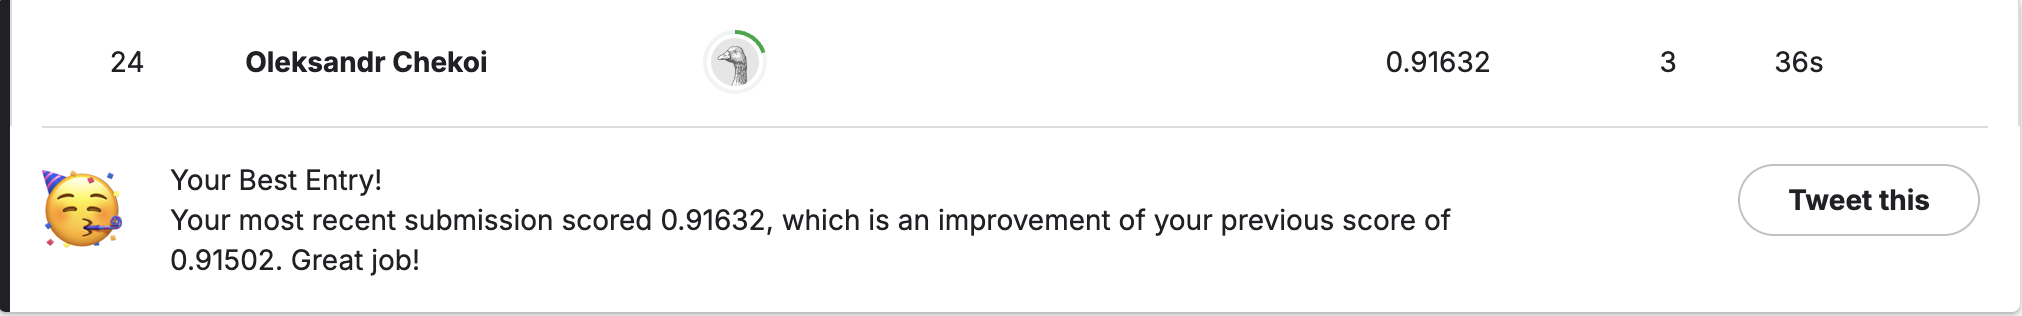